In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

df = pd.read_csv("eval_ckpt1350.csv")
df

,i,pos0,pos1,pos2,pos3,pos4,pos5,pos6,vel0,vel1,...,obs6,obs7,obs8,obs9,obs10,obs11,obs12,obs13,obs14,obs15
0,0,0.000106,-0.000002,0.079475,-0.053403,-0.924513,-0.026634,3.617716,0.020129,-0.000408,...,0.080261,-0.001362,0.201290,-0.004079,-0.998935,0.028282,0.361772,-0.848665,0.528931,0.0
1,1,0.000302,-0.000006,0.077963,-0.053075,-0.919832,-0.026353,3.631476,0.019129,-0.000383,...,0.076188,-0.001287,0.191294,-0.003827,-1.977768,0.026829,0.363148,-0.848665,0.528931,0.0
2,2,0.000488,-0.000010,0.075471,-0.052768,-0.915389,-0.026089,3.644529,0.018174,-0.000359,...,0.072308,-0.001217,0.181739,-0.003592,-2.956836,0.025447,0.364453,-0.848665,0.528931,0.0
3,3,0.000665,-0.000013,0.072000,-0.052483,-0.911172,-0.025842,3.656908,0.017261,-0.000337,...,0.068613,-0.001151,0.172612,-0.003371,-3.936114,0.024133,0.365691,-0.848665,0.528931,0.0
4,4,0.002042,-0.000110,0.070671,-0.050877,-0.890785,-0.025318,3.696625,0.197086,-0.014219,...,0.468857,-0.017500,1.970860,-0.142188,-0.279231,0.106404,0.369662,-0.848665,0.528931,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,-8.135753,-0.000960,0.081512,-0.371130,-0.433270,0.129289,-42.099247,-0.884831,-1.458183,...,-2.193642,0.468013,-8.848307,-14.581829,-5.146379,-0.197696,-4.209925,-0.832038,-0.554719,0.0
1996,1996,-8.143849,-0.014660,0.077933,-0.201184,-0.557369,0.119924,-42.256138,-0.749125,-1.297496,...,-1.792974,0.408807,-7.491252,-12.974958,-2.001184,-0.408014,-4.225614,-0.832038,-0.554719,0.0
1997,1997,-8.150690,-0.027386,0.075427,-0.030697,-0.682634,0.132832,-42.516693,-0.617532,-1.252193,...,-2.305312,0.396750,-6.175316,-12.521933,-3.035893,-0.624698,-4.251669,-0.832038,-0.554719,0.0
1998,1998,-8.155990,-0.039666,0.071579,0.160240,-0.834938,0.176992,-42.883865,-0.443737,-1.201712,...,-2.809908,0.326411,-4.437367,-12.017122,-4.711717,-0.833938,-4.288387,-0.832038,-0.554719,0.0


In [5]:
cmd = np.array([df['obs13'], df['obs14']]).T
linvel = np.array([df['vel0'], df['vel1']]).T
# /*************  ✨ Codeium Command ⭐  *************/
df['alignedvel'] = np.einsum('ij,ij->i', cmd, linvel)
df['alignedvel']

0      -0.017299
1      -0.016437
2      -0.015614
3      -0.014827
4      -0.174781
          ...   
1995    1.545094
1996    1.343046
1997    1.208425
1998    1.035818
1999    0.861900
Name: alignedvel, Length: 2000, dtype: float64

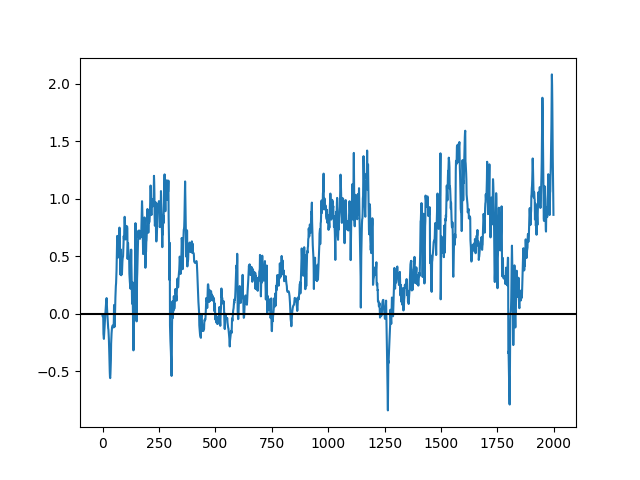

In [6]:
plt.figure()
plt.plot(df['i'], df['alignedvel'])
plt.axhline(0, color='k')


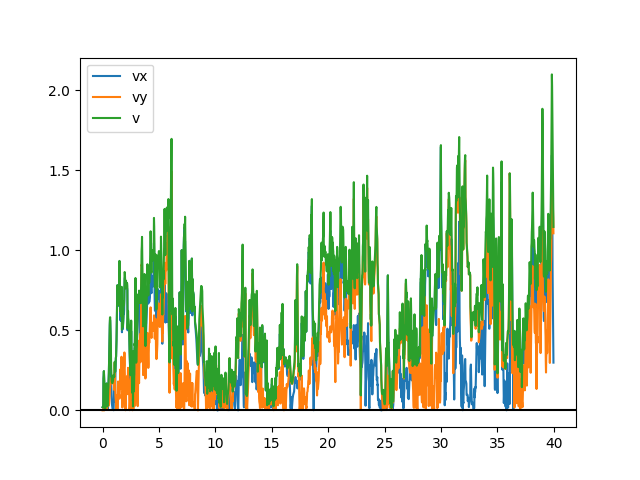

In [7]:
velnorm = np.linalg.norm(linvel, axis=1)
plt.figure()
plt.plot(df['i']*2/100., np.abs(linvel[:,0]), label='vx')
plt.plot(df['i']*2/100., np.abs(linvel[:,1]), label='vy')
plt.plot(df['i']*2/100., velnorm, label='v')
plt.axhline(0, color='k')
plt.legend()

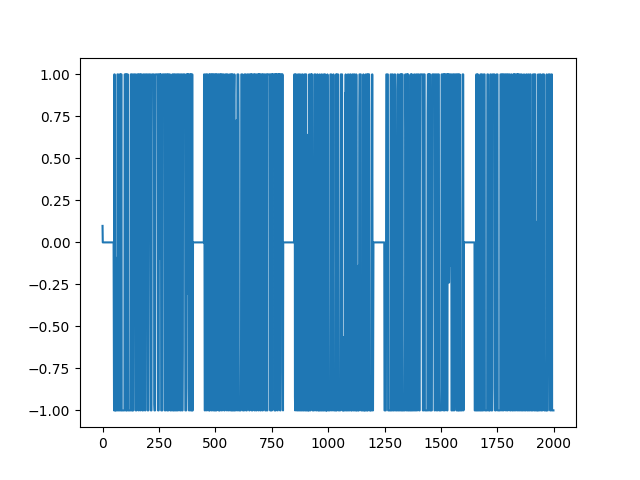

In [9]:
plt.figure()
plt.plot(df['i'], np.clip(df['action'], a_min=-1, a_max=1))